In [1]:
from kitaev import *
from tqdm import tqdm
from scipy.misc import derivative as dif
from scipy.integrate import quad
plt.style.use(["default",'seaborn-v0_8-poster','normal_font.mplstyle'])
from math import floor, ceil

In [2]:
t=1
N_global = 100
d_global = 2
mu1 = 0* t 
mu2 = 6.5 * t 
#mu2 = 3 * t 
delta1 = 1 * t 
delta2 = 1 * t 
t1 = 1 * t 
t2 = 1 * t
#var_T = [0.5, 1.5, 2.3, 2.8, 4.7] #for mu2 = 3
var_T = [0.9, 1.5, 2, 2.8, 4.5] #for mu2 = 6.5
#var_T = np.linspace(0.2,5,50)
h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu1), v=offsite(_delta=delta1, _t=t1))
h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu2), v=offsite(_delta=delta2, _t=t2))
zero_modes = []
pi_modes = []
#evecs = []
for T in var_T:
    #eval, evec = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=T)
    eval, evec = floquet_hamiltonian([(3/4)*h_2.lattice_hamiltonian(), (3/2)*h_1.lattice_hamiltonian(),(3/4)*h_2.lattice_hamiltonian()], T=T)
    #eval, evec = floquet_hamiltonian([(3/4)*h_1.lattice_hamiltonian(), (3/2)*h_2.lattice_hamiltonian(),(3/4)*h_1.lattice_hamiltonian()], T=T)
    smol = 1e-5
    indices_pi, num_pi = check_modes(eval,1,_e_threshold=smol)
    indices_zero, num_zero = check_modes(eval,0,_e_threshold=smol)
    zero_modes.append((eval[indices_zero],evec[:,indices_zero]))
    pi_modes.append((eval[indices_pi],evec[:,indices_pi]))


'''    hf1 = floquet_hamiltonian2([(3/4)*h_2.lattice_hamiltonian(), (3/2)*h_1.lattice_hamiltonian(),(3/4)*h_2.lattice_hamiltonian()], T=T)
    hf2 = floquet_hamiltonian2([(3/4)*h_1.lattice_hamiltonian(), (3/2)*h_2.lattice_hamiltonian(),(3/4)*h_1.lattice_hamiltonian()], T=T)
    Gamma = s_x.unsqueeze(0).repeat(N_global,1,1)
    Gamma = torch.block_diag(*Gamma)
    #eval1, evec1 = la.eig(Gamma@hf1)
    eval1, evec1 = la.eigh(10*Gamma+hf1)
    eval2, evec2 = la.eigh(10*Gamma + hf2@hf2)
    smol = 5e-7
    print('first '+str(T))
    print(np.sort(torch.abs(eval1).cpu().real))


    zero_modes.append(plot_modes(eval1,evec1,10,e_threshold=smol))
    _pi_mode_1 = plot_modes(eval1,evec1,11,e_threshold=smol*100)
    _pi_mode_1 = _pi_mode_1 if _pi_mode_1 is not None else 0
    _pi_mode_2 = plot_modes(eval1,evec1,9,e_threshold=smol*100)
    _pi_mode_2 = _pi_mode_2 if _pi_mode_2 is not None else 0
    pi_modes.append(_pi_mode_1+_pi_mode_2)
    evecs.append(evec1)
'''

'''    zero_modes.append(plot_modes(eval2,evec2,10,e_threshold=smol))
    _pi_mode_1 = plot_modes(eval2,evec2,11,e_threshold=smol)
    _pi_mode_1 = _pi_mode_1 if _pi_mode_1 is not None else 0
    _pi_mode_2 = plot_modes(eval2,evec2,9,e_threshold=smol)
    _pi_mode_2 = _pi_mode_2 if _pi_mode_2 is not None else 0
    pi_modes.append(_pi_mode_1+_pi_mode_2)
    evecs.append(evec1)'''





'''    print('second')
    eval, evec = floquet_hamiltonian([(3/4)*h_2.lattice_hamiltonian(), (3/2)*h_1.lattice_hamiltonian(),(3/4)*h_2.lattice_hamiltonian()], T=T)
    zero_modes.append(plot_modes(eval,evec,0,e_threshold=smol))
    pi_modes.append(plot_modes(eval,evec,1,e_threshold=smol))
    evecs.append(evec)






    indices_pi, num_pi = check_modes(eval1,11,e_threshold=smol)
    _ind_pi, _num_pi = check_modes(eval1,9,e_threshold=smol)
    indices_pi += _ind_pi
    indices_zero, num_zero = check_modes(eval1,10,e_threshold=smol)
    zero_modes.append((eval1[indices_zero],evec1[:,indices_zero]))
    pi_modes.append((eval1[indices_pi],evec1[:,indices_pi]))
'''


"    print('second')\n    eval, evec = floquet_hamiltonian([(3/4)*h_2.lattice_hamiltonian(), (3/2)*h_1.lattice_hamiltonian(),(3/4)*h_2.lattice_hamiltonian()], T=T)\n    zero_modes.append(plot_modes(eval,evec,0,e_threshold=smol))\n    pi_modes.append(plot_modes(eval,evec,1,e_threshold=smol))\n    evecs.append(evec)\n\n\n\n\n\n\n    indices_pi, num_pi = check_modes(eval1,11,e_threshold=smol)\n    _ind_pi, _num_pi = check_modes(eval1,9,e_threshold=smol)\n    indices_pi += _ind_pi\n    indices_zero, num_zero = check_modes(eval1,10,e_threshold=smol)\n    zero_modes.append((eval1[indices_zero],evec1[:,indices_zero]))\n    pi_modes.append((eval1[indices_pi],evec1[:,indices_pi]))\n"

In [3]:
'''x = np.linspace(0,200, 1000)
plt.title(f"wave functions for $\pi$ modes")
for i in range(len(var_T)):
    if pi_modes[i] is not None:
        plt.plot(np.abs(evecs[i][:,pi_modes[i][0]])**2, label = f'T = {var_T[i]}',linestyle='solid')
        plt.plot(x, np.interp(x, range(200), np.abs(evecs[i][:,pi_modes[i][0]])**2), label = f'T = {var_T[i]}',linestyle='dotted')
        
    #if zero_modes[i] is not None:
        #plt.plot(np.abs(evecs[i][:,zero_modes[i][0]])**2, label = f'T = {var_T[i]}')
plt.ylabel('$|\psi|^2$')
plt.xlabel('particle-hole space')
#plt.yscale('log')
plt.legend()
#plt.savefig(f'probability density for pi majorana-mu1=0,mu2={mu2},delta1=delta2=t.pdf', bbox_inches = 'tight')
plt.show()
'''
'''
plt.title(f"wave functions for zero modes")
for i in range(len(var_T)):
    if pi_modes[i] is not None:
        plt.plot(np.abs(evecs[i][:,zero_modes[i][0]])**2, label = f'T = {var_T[i]}')
plt.ylabel('$|\psi|^2$')
plt.xlabel('particle-hole space')
#plt.yscale('log')
plt.legend()
#plt.savefig(f'probability density for zero majorana-mu1=0,mu2={mu2},delta1=delta2=t.pdf', bbox_inches = 'tight')
plt.show()

'''

'\nplt.title(f"wave functions for zero modes")\nfor i in range(len(var_T)):\n    if pi_modes[i] is not None:\n        plt.plot(np.abs(evecs[i][:,zero_modes[i][0]])**2, label = f\'T = {var_T[i]}\')\nplt.ylabel(\'$|\\psi|^2$\')\nplt.xlabel(\'particle-hole space\')\n#plt.yscale(\'log\')\nplt.legend()\n#plt.savefig(f\'probability density for zero majorana-mu1=0,mu2={mu2},delta1=delta2=t.pdf\', bbox_inches = \'tight\')\nplt.show()\n\n'

torch.Size([4]) torch.Size([200, 4])
torch.Size([100])


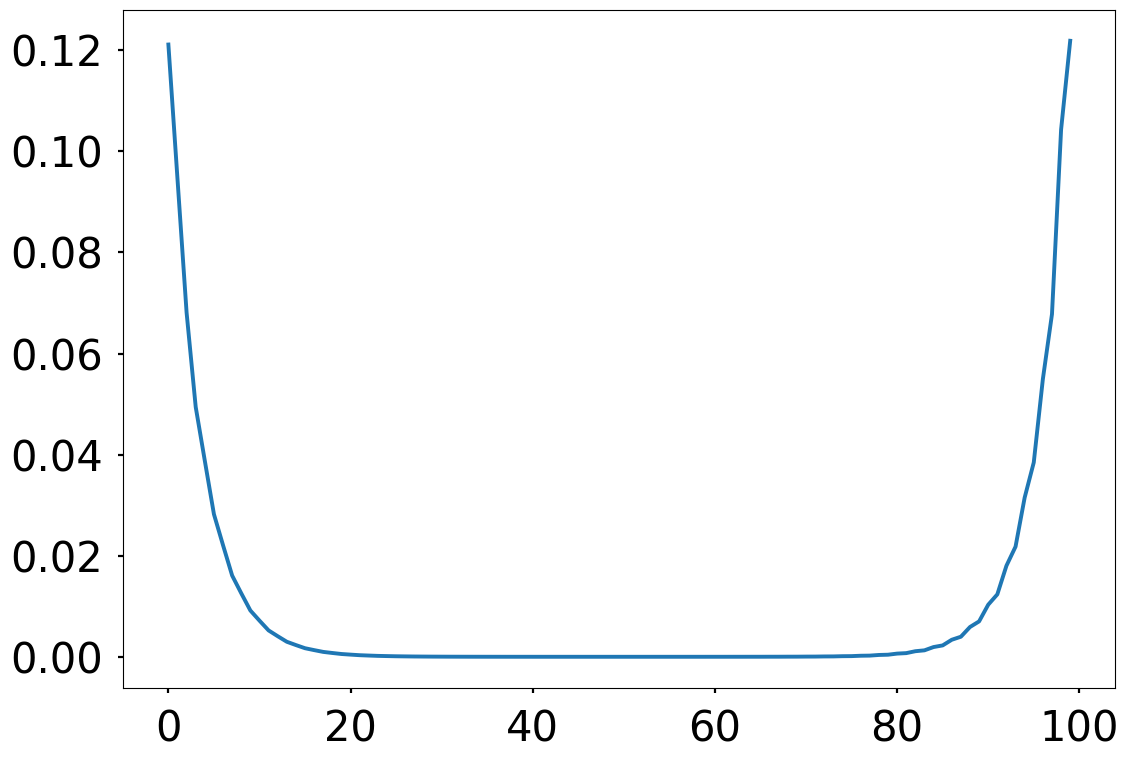

In [4]:
a,b = zero_modes[3]
print(a.shape,b.shape)
if list(a.shape) == [0]:
    print('hi')
c = torch.sum(torch.abs(b)**2,dim=1)/4
c = c[::2] + c[1::2]
print(c.shape)
plt.plot(c.cpu().numpy())
plt.show()

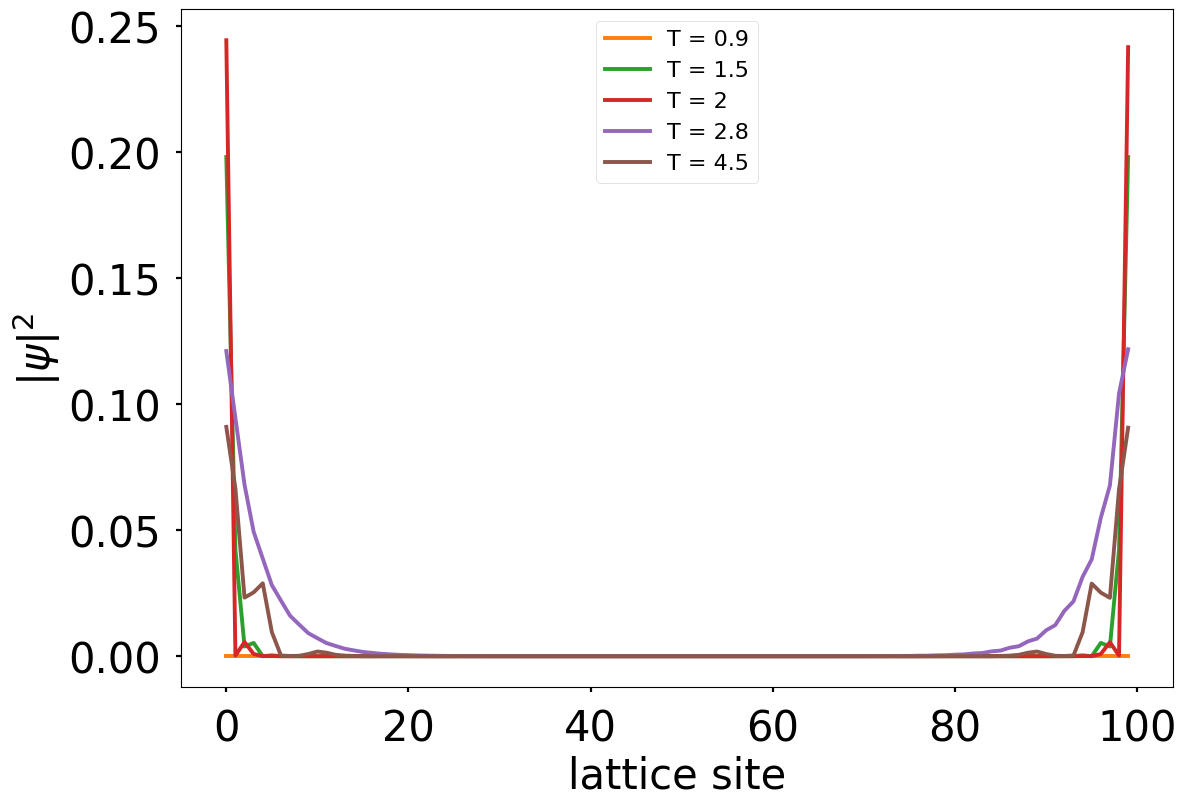

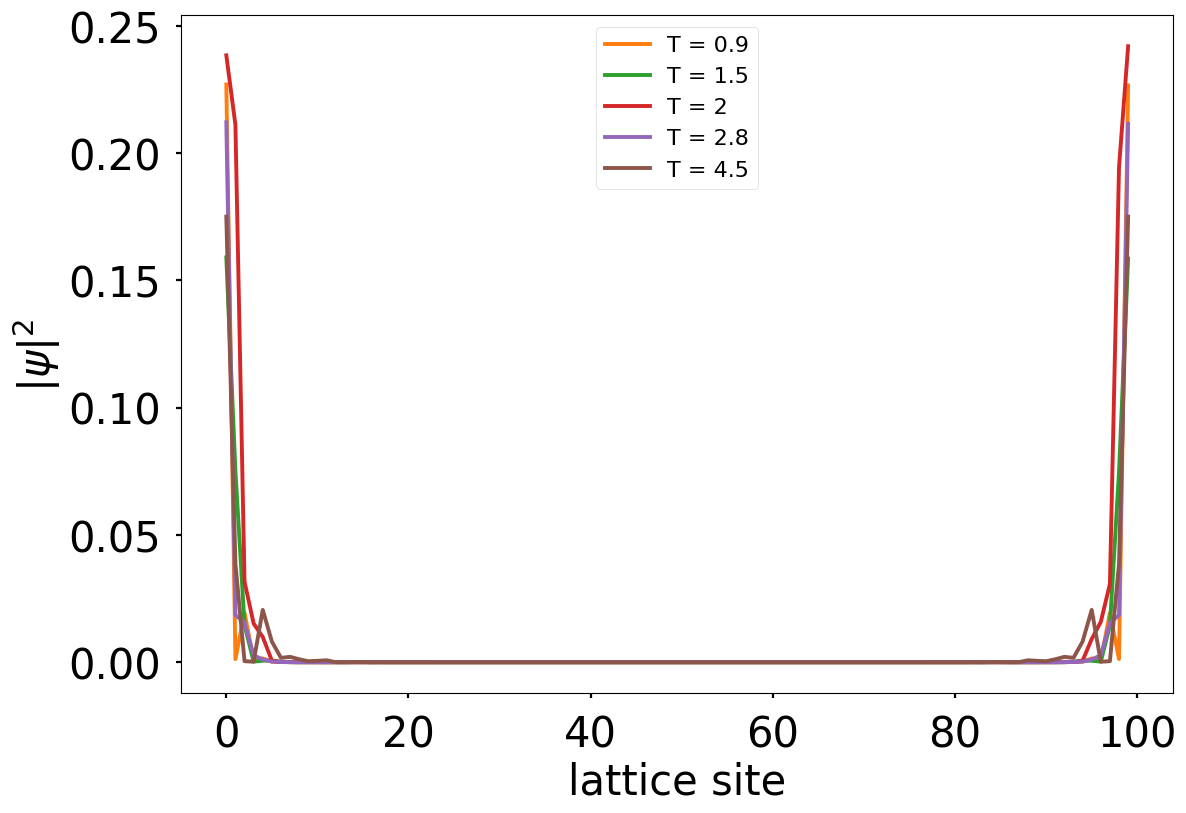

In [5]:
colors = ['C1','C2','C3','C4','C5','C6','C7','C8']
plt.title(f"", color = 'C0')
i = -1
for a,b in zero_modes:
    i+=1
    if list(a.shape) == [0]:
        pass
    c = torch.sum(torch.abs(b)**2,dim=1)/4
    c = c[::2] + c[1::2]
    c = c.cpu().numpy()
    plt.plot(c, colors[i], label = f'T = {var_T[i]}')




plt.ylabel('$|\psi|^2$')
plt.xlabel('lattice site')
#plt.yscale('log')
plt.legend()
plt.savefig(f'./graphs/probability density zero majorana-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global}.pdf', bbox_inches = 'tight')
plt.show()




i = -1
for a,b in pi_modes:
    i+=1
    if list(a.shape) == [0]:
        pass
    c = torch.sum(torch.abs(b)**2,dim=1)/4
    c = c[::2] + c[1::2]
    c = c.cpu().numpy()
    plt.plot(c, colors[i], label = f'T = {var_T[i]}')



plt.ylabel('$|\psi|^2$')
plt.xlabel('lattice site')
#plt.yscale('log')
plt.legend()
plt.savefig(f'./graphs/probability density pi majorana-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global}.pdf', bbox_inches = 'tight')
plt.show()


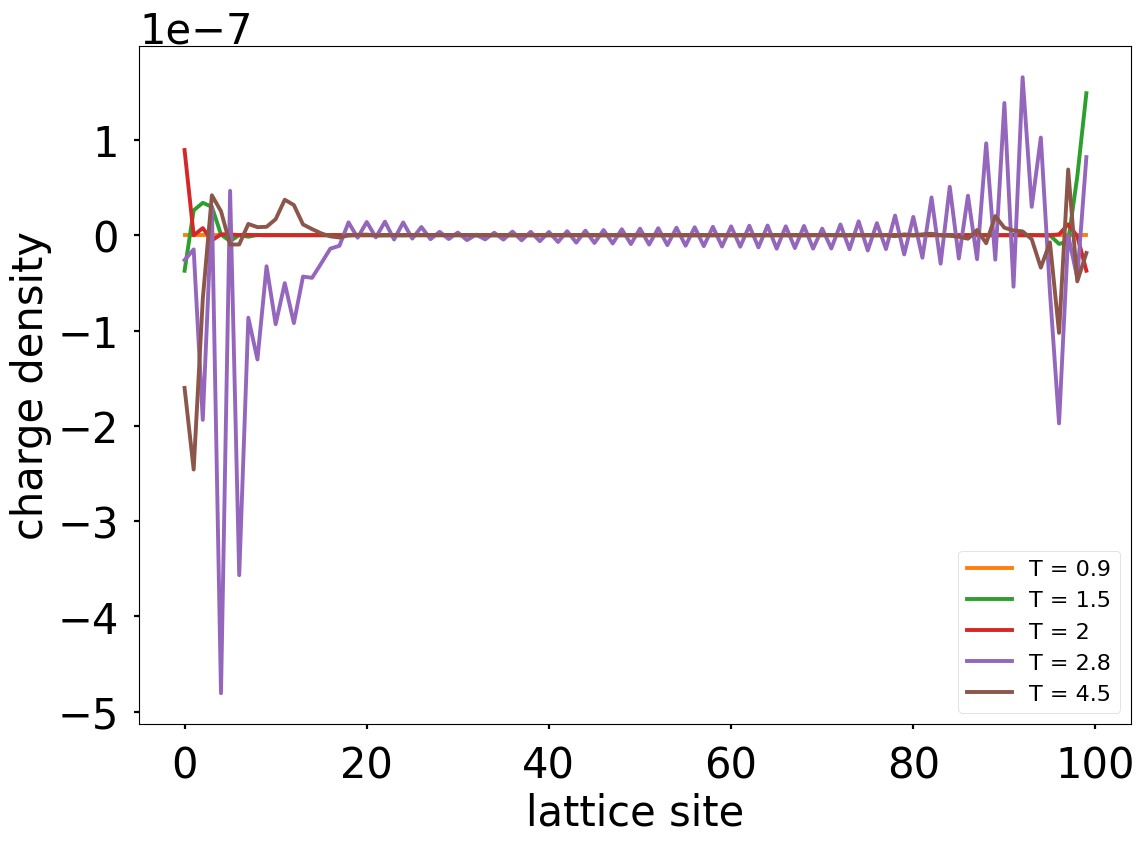

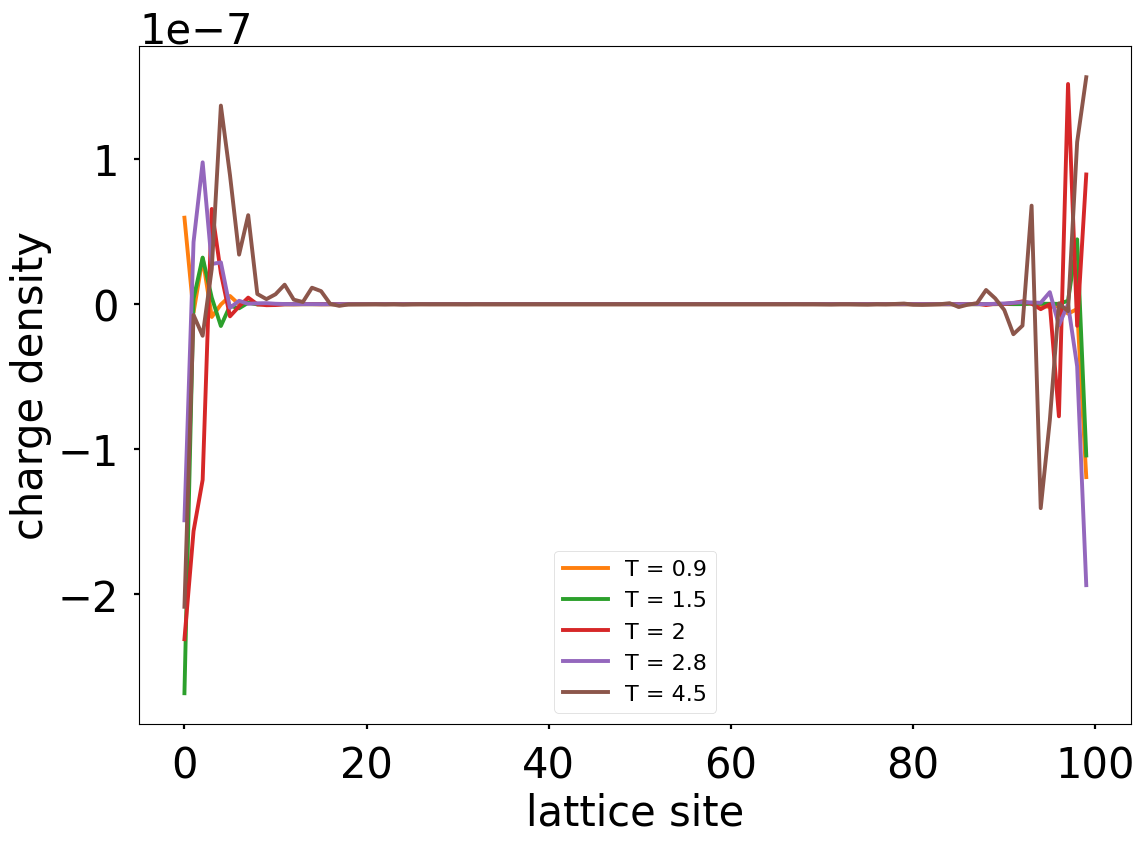

In [6]:
colors = ['C1','C2','C3','C4','C5','C6','C7','C8']
plt.title(f"", color = 'C0')
i = -1
for a,b in zero_modes:
    i+=1
    if list(a.shape) == [0]:
        pass
    c = torch.sum(torch.abs(b)**2,dim=1)/4
    c = c[::2] - c[1::2]
    c = c.cpu().numpy()
    plt.plot(c, colors[i], label = f'T = {var_T[i]}')




plt.ylabel('charge density')
plt.xlabel('lattice site')
#plt.yscale('log')
plt.legend()
plt.savefig(f'./graphs/charge density zero majorana-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global}.pdf', bbox_inches = 'tight')
plt.show()




i = -1
for a,b in pi_modes:
    i+=1
    if list(a.shape) == [0]:
        pass
    c = torch.sum(torch.abs(b)**2,dim=1)/4
    c = c[::2] - c[1::2]
    c = c.cpu().numpy()
    plt.plot(c, colors[i], label = f'T = {var_T[i]}')



plt.ylabel('charge density')
plt.xlabel('lattice site')
#plt.yscale('log')
plt.legend()
plt.savefig(f'./graphs/charge density pi majorana-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global}.pdf', bbox_inches = 'tight')
plt.show()


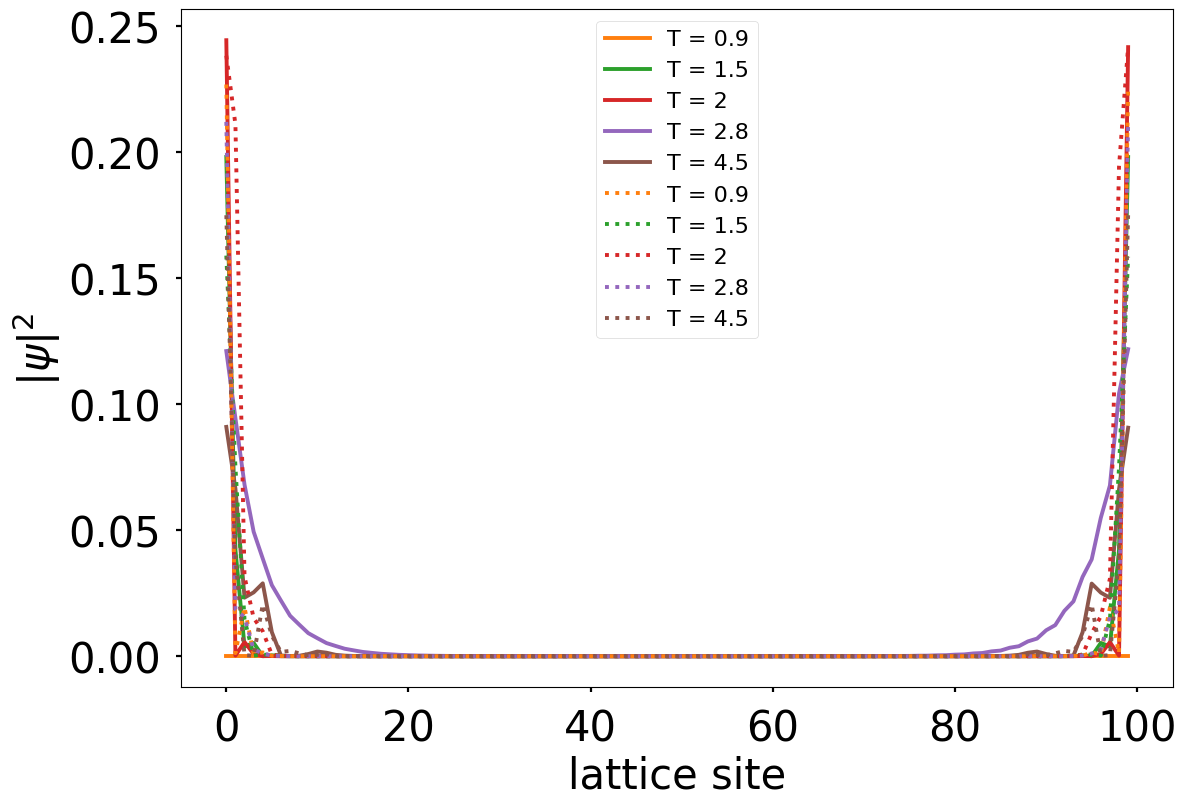

In [7]:
colors = ['C1','C2','C3','C4','C5','C6','C7','C8']
plt.title(f"", color = 'C0')
i = -1
for a,b in zero_modes:
    i+=1
    if list(a.shape) == [0]:
        pass
    c = torch.sum(torch.abs(b)**2,dim=1)/4
    c = c[::2] + c[1::2]
    c = c.cpu().numpy()
    plt.plot(c, colors[i], label = f'T = {var_T[i]}')


i = -1
for a,b in pi_modes:
    i+=1
    if list(a.shape) == [0]:
        pass
    c = torch.sum(torch.abs(b)**2,dim=1)/4
    c = c[::2] + c[1::2]
    c = c.cpu().numpy()
    plt.plot(c, colors[i], label = f'T = {var_T[i]}',linestyle='dotted')



plt.ylabel('$|\psi|^2$')
plt.xlabel('lattice site')
#plt.yscale('log')
plt.legend()
plt.savefig(f'./graphs/probability density zero and pi majorana-mu1={mu1}t, mu2={mu2}t, delta1={delta1}t, delta2={delta2}t,t1={t1}t,t2={t2}t, N={N_global}.pdf', bbox_inches = 'tight')
plt.show()


In [8]:
'''from scipy.optimize import curve_fit

def fit_f(x,a,b,c,d,h):
  return (a*np.exp(-b*(x-h))*np.cos(np.pi*c*(x+d)))**2

def fit_f(x,a,b,c):
  return (a*np.exp(-b*(x)**2)*np.cos(np.pi*c*(x))**2)

colors = ['C1','C2','C3','C4','C5','C6','C7','C8']

plt.title(f"", color = 'C0')
for i in range(len(var_T)):
    
    if zero_modes[i] is not None:
        density_zero = np.abs(evecs[i][:,zero_modes[i][0]])**2
        density_zerov2 = [density_zero[2*j]+density_zero[2*j+1] for j in range(N_global)]
        popt, pcov = curve_fit(fit_f, np.arange(0,100,1), density_zerov2, p0=[0.3,0.1,0.2])
        plt.plot(fit_f(np.arange(0,100,0.5),popt[0],popt[1],popt[2]), colors[i], label = f'T = {var_T[i]}',linestyle='solid')
        #plt.plot(density_zerov2, colors[i], label = f'T = {var_T[i]}')
        #p = np.poly1d(np.polyfit(np.arange(0,100,1),np.log(density_zerov2),100))
        #plt.plot(np.exp(p(np.arange(0,100,1))), colors[i], label = f'T = {var_T[i]}',linestyle='dashed')
    
'''    '''
    if pi_modes[i] is not None:
        density_pi = np.abs(evecs[i][:,pi_modes[i][0]])**2
        density_piv2 = [density_pi[2*j]+density_pi[2*j+1] for j in range(N_global)]
        plt.plot( density_piv2 , colors[i] , label = f'T = {var_T[i]}',linestyle='dotted')
        #p = np.poly1d(np.polyfit(np.arange(0,100,1),np.log(density_piv2),150))
        #plt.plot(np.exp(p(np.arange(0,100,1))), colors[i], label = f'T = {var_T[i]}',linestyle='dashed')'''

'''        
    plt.ylabel('$|\psi|^2$')
    plt.xlabel('lattice site')
    #plt.yscale('log')
    plt.legend()
    #plt.savefig(f'probability density -mu1=0,mu2=3,delta1=delta2=t.pdf', bbox_inches = 'tight')
    plt.show()
'''

"        \n    plt.ylabel('$|\\psi|^2$')\n    plt.xlabel('lattice site')\n    #plt.yscale('log')\n    plt.legend()\n    #plt.savefig(f'probability density -mu1=0,mu2=3,delta1=delta2=t.pdf', bbox_inches = 'tight')\n    plt.show()\n"